### Loading Images

In [1]:
import os
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
current_directory = os.getcwd()

In [3]:
current_directory

'C:\\Users\\sruji\\Downloads\\DS\\ML Practice\\CNN\\Facial expression detection'

In [4]:
train_path = os.path.join(current_directory, 'archive', 'train')

In [5]:
train_path

'C:\\Users\\sruji\\Downloads\\DS\\ML Practice\\CNN\\Facial expression detection\\archive\\train'

In [6]:
test_path = os.path.join(current_directory, 'archive', 'test')

In [7]:
test_path

'C:\\Users\\sruji\\Downloads\\DS\\ML Practice\\CNN\\Facial expression detection\\archive\\test'

In [8]:
surprise_train = os.path.join(train_path, 'surprise')

In [9]:
surprise_test = os.path.join(test_path, 'surprise')

In [10]:
sad_train = os.path.join(train_path, 'sad')

In [11]:
sad_test = os.path.join(test_path, 'sad')

In [12]:
neutral_train = os.path.join(train_path, 'neutral')

In [13]:
neutral_test = os.path.join(test_path, 'neutral')

In [14]:
happy_train = os.path.join(train_path, 'happy')

In [15]:
happy_test = os.path.join(test_path, 'happy')

In [16]:
fear_train = os.path.join(train_path, 'fear')

In [17]:
fear_test = os.path.join(test_path, 'fear')

In [18]:
disgust_train = os.path.join(train_path, 'disgust')

In [19]:
disgust_test = os.path.join(test_path, 'disgust')

In [20]:
angry_train = os.path.join(train_path, 'angry')

In [21]:
angry_test = os.path.join(test_path, 'angry')

In [22]:
labels = {'surprise':0,'sad':1, 'neutral':2, 'happy':3, 'fear':4, 'disgust':5, 'angry':6}

In [23]:
train_paths = {'surprise':surprise_train,'sad':sad_train, 'neutral':neutral_train, 'happy':happy_train, 'fear':fear_train, 'disgust':disgust_train, 'angry':angry_train}

In [24]:
train_paths

{'surprise': 'C:\\Users\\sruji\\Downloads\\DS\\ML Practice\\CNN\\Facial expression detection\\archive\\train\\surprise',
 'sad': 'C:\\Users\\sruji\\Downloads\\DS\\ML Practice\\CNN\\Facial expression detection\\archive\\train\\sad',
 'neutral': 'C:\\Users\\sruji\\Downloads\\DS\\ML Practice\\CNN\\Facial expression detection\\archive\\train\\neutral',
 'happy': 'C:\\Users\\sruji\\Downloads\\DS\\ML Practice\\CNN\\Facial expression detection\\archive\\train\\happy',
 'fear': 'C:\\Users\\sruji\\Downloads\\DS\\ML Practice\\CNN\\Facial expression detection\\archive\\train\\fear',
 'disgust': 'C:\\Users\\sruji\\Downloads\\DS\\ML Practice\\CNN\\Facial expression detection\\archive\\train\\disgust',
 'angry': 'C:\\Users\\sruji\\Downloads\\DS\\ML Practice\\CNN\\Facial expression detection\\archive\\train\\angry'}

In [25]:
def get_images(path, label, size=(64,64)):
    labels=[]
    images=[]
    for filename in os.listdir(path):
        if filename.lower().endswith('jpg'):
            filepath = os.path.join(path, filename)
            img = cv2.imread(filepath)
            if img is None:
                print(f'Failed to load Image: {filepath}')
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, size)
            img = img/255.0
            images.append(img)
            labels.append(label)

        if len(images)>10000:
            break
    images = np.array(images).reshape(-1, size[0], size[1], 1)
    labels = np.array(labels, dtype=np.int32)
    return images, labels

In [27]:
def load_dataset(train_paths, label_map, size=(64,64)):
    all_images=[]
    all_labels=[]

    for emotion, path in train_paths.items():
        print(f'Loading emotion {emotion}')
        label = label_map[emotion]
        images, labels = get_images(path, label)
        all_images.append(images)
        all_labels.append(labels)

    X = np.vstack(all_images)
    y = np.hstack(all_labels)

    return X, y

In [28]:
X, y = load_dataset(train_paths, labels)

Loading emotion surprise
Loading emotion sad
Loading emotion neutral
Loading emotion happy
Loading emotion fear
Loading emotion disgust
Loading emotion angry


In [29]:
X.shape

(28709, 64, 64, 1)

In [30]:
y.shape

(28709,)

In [31]:
test_paths = {'surprise':surprise_test,'sad':sad_test, 'neutral':neutral_test, 'happy':happy_test, 'fear':fear_test, 'disgust':disgust_test, 'angry':angry_test}

In [32]:
X_test, y_test = load_dataset(test_paths, labels)

Loading emotion surprise
Loading emotion sad
Loading emotion neutral
Loading emotion happy
Loading emotion fear
Loading emotion disgust
Loading emotion angry


In [33]:
X_test.shape

(7178, 64, 64, 1)

In [34]:
y_test.shape

(7178,)

### Data Augmentation

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

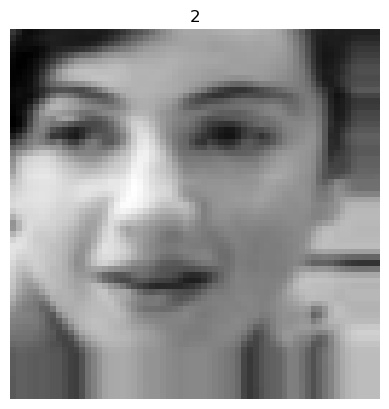

In [40]:
for X_batch, y_batch in datagen.flow(X, y, batch_size=1):
    plt.imshow(X_batch[0].reshape(64,64), cmap='gray')
    plt.title(f'{y_batch[0]}')
    plt.axis('off')
    plt.show()
    break

### Model building

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D ,Dropout, Activation, BatchNormalization, Flatten, MaxPooling2D, Input

In [43]:
i = Input(shape=(64,64,1))
x = Conv2D(32, (3,3), use_bias=False, padding='same')(i)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, (3,3), use_bias=False, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), use_bias=False, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, (3,3), use_bias=False, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), use_bias=False, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, (3,3), use_bias=False, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D((2,2))(x)

x = Flatten()(x)

x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(len(labels), activation='softmax')(x)

In [57]:
model = Model(i,x)

In [58]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
result = model.fit(datagen.flow(X, y, batch_size=64),
    validation_data=(X_test, y_test), 
    epochs=5, steps_per_epoch=len(X)//64)

Epoch 1/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 254s 566ms/step - accuracy: 0.6215 - loss: 0.9973 - val_accuracy: 0.5945 - val_loss: 1.0759
Epoch 2/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6719 - loss: 1.0012 - val_accuracy: 0.5915 - val_loss: 1.0864
Epoch 3/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 291s 650ms/step - accuracy: 0.6212 - loss: 0.9963 - val_accuracy: 0.5850 - val_loss: 1.0949
Epoch 4/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5938 - loss: 1.1035 - val_accuracy: 0.5875 - val_loss: 1.0867
Epoch 5/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 288s 643ms/step - accuracy: 0.6254 - loss: 0.9837 - val_accuracy: 0.6140 - val_loss: 1.0187


### Early stop & Checkpoint

In [51]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [53]:
earlystop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

In [55]:
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [63]:
history = model.fit(
    datagen.flow(X, y, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=20,
    steps_per_epoch=len(X)//64,
    callbacks=[earlystop, checkpoint]
)

Epoch 1/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.6492 - loss: 0.9301  
Epoch 1: val_accuracy did not improve from 0.62399
448/448 ━━━━━━━━━━━━━━━━━━━━ 265s 591ms/step - accuracy: 0.6492 - loss: 0.9301 - val_accuracy: 0.6023 - val_loss: 1.0701
Epoch 2/20
  1/448 ━━━━━━━━━━━━━━━━━━━━ 4:32 611ms/step - accuracy: 0.6250 - loss: 0.9621
Epoch 2: val_accuracy did not improve from 0.62399
448/448 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.6250 - loss: 0.9621 - val_accuracy: 0.6024 - val_loss: 1.0772
Epoch 3/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.6556 - loss: 0.9107  
Epoch 3: val_accuracy did not improve from 0.62399
448/448 ━━━━━━━━━━━━━━━━━━━━ 279s 623ms/step - accuracy: 0.6556 - loss: 0.9108 - val_accuracy: 0.6117 - val_loss: 1.0266
Epoch 4/20
  1/448 ━━━━━━━━━━━━━━━━━━━━ 4:21 586ms/step - accuracy: 0.6719 - loss: 0.8483
Epoch 4: val_accuracy did not improve from 0.62399
448/448 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.6719 - loss: 0.848

448/448 ━━━━━━━━━━━━━━━━━━━━ 285s 637ms/step - accuracy: 0.6617 - loss: 0.8966 - val_accuracy: 0.6262 - val_loss: 0.9895
Epoch 8/20
  1/448 ━━━━━━━━━━━━━━━━━━━━ 4:30 606ms/step - accuracy: 0.6562 - loss: 0.9956
Epoch 8: val_accuracy improved from 0.62622 to 0.62761, saving model to best_model.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.6562 - loss: 0.9956 - val_accuracy: 0.6276 - val_loss: 0.9854
Epoch 9/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.6702 - loss: 0.8814  
Epoch 9: val_accuracy did not improve from 0.62761
448/448 ━━━━━━━━━━━━━━━━━━━━ 286s 639ms/step - accuracy: 0.6702 - loss: 0.8814 - val_accuracy: 0.6237 - val_loss: 1.0087
Epoch 10/20
  1/448 ━━━━━━━━━━━━━━━━━━━━ 4:26 595ms/step - accuracy: 0.6875 - loss: 0.9468
Epoch 10: val_accuracy did not improve from 0.62761
448/448 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.6875 - loss: 0.9468 - val_accuracy: 0.6162 - val_loss: 1.0231
Epoch 11/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.6764 - loss: 0.8669  
Epoch 11: val_accuracy did not improve from 0.62761
448/448 ━━━━━━━━━━━━━━━━━━━━ 288s 644ms/step - accuracy: 0.6764 - loss: 0.8670 - val_accuracy: 0.6195 - val_loss: 1.0149


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
angry


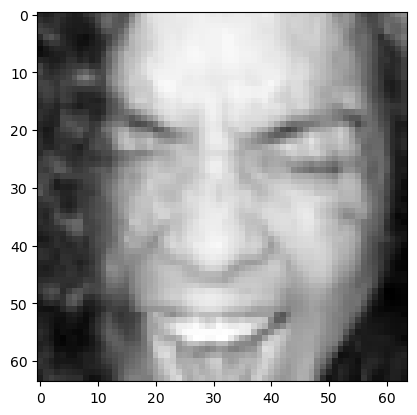

In [70]:
idx = random.randint(0, len(X_test)-1)
plt.imshow(X_test[idx].squeeze(), cmap='gray')
pred = model.predict(np.expand_dims(X_test[idx], axis=0))
pred = np.argmax(pred)
for key, value in labels.items():
    if value == pred:
        print(key)
        break
    else:
        continue

In [72]:
model.save('best_model.keras')

### Prediction

In [137]:
from tensorflow.keras.models import load_model

In [138]:
model = load_model('best_model.keras', compile=True)

C:\Users\sruji\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [139]:
def predict_custom(img_name):
    path = os.path.join(current_directory, img_name)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64,64))
    img = img.reshape(1,64,64,1)/255.0
    pred = model.predict(img)
    pred_class = np.argmax(pred)
    for key, value in labels.items():
        if value == pred_class:
            print(key)
            break
        else:
            continue
    img_print = img.squeeze()
    plt.imshow(img_print, cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
happy


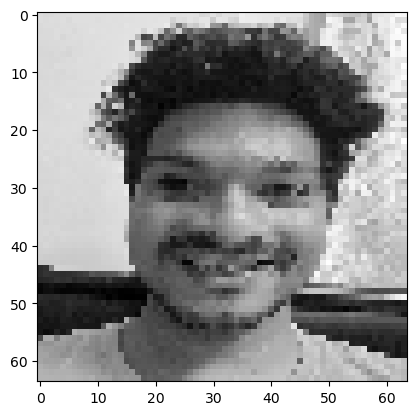

In [140]:
predict_custom('image.jpg')